## Procedure:     Uncertainty propagation for matrix-based LCA



### Method:        Monte Carlo simulation (normal random)

Author:        Evelyne Groen {evelyne [dot] groen [at] gmail [dot] com}

Last update:   25/10/2016 

In [21]:
import numpy as np 

A_det = np.matrix('10 0; -2 100') #A-matrix
B_det = np.matrix('1 10')         #B-matrix
f = np.matrix('1000; 0')          #Functional unit vector f

g_LCA = B_det * A_det.I * f 
print("The deterministic result is:", g_LCA[0,0])                    


The deterministic result is: 120.0


### Monte Carlo simulation using normal distribution functions for all input parameters

The mean values are equal to the initial values of A and B. 
The standard deviation equals 5% of the mean of A and B. 

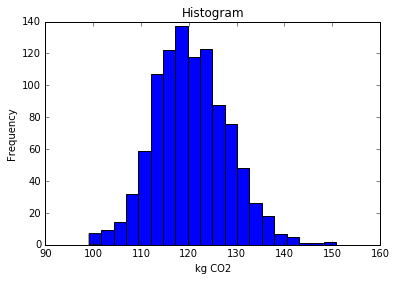

In [19]:
N = 1000                        #Sample size
CV = 0.05                       #Coefficient of variation (CV = sigma/mu)

import random

A1 = [random.gauss(A_det[0,0], CV*A_det[0,0]) for i in range(N)]
A3 = [random.gauss(A_det[1,0], CV*A_det[1,0]) for i in range(N)]
A4 = [random.gauss(A_det[1,1], CV*A_det[1,1]) for i in range(N)]

B1 = [random.gauss(B_det[0,0], CV*B_det[0,0]) for i in range(N)]
B2 = [random.gauss(B_det[0,1], CV*B_det[0,1]) for i in range(N)]


As = [np.matrix([[A1[i], 0],[A3[i], A4[i]]]) for i in range(N)]
Bs = [np.matrix([[B1[i], B2[i]]]) for i in range(N)]

f  = np.matrix('1000; 0')

gs = [B * A.I * f for A, B in zip(As, Bs)]

g_list =[g[0,0] for g in gs]

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.hist(g_list,20)
plt.title("Histogram")
plt.xlabel("kg CO2")
plt.ylabel("Frequency")

fig = plt.gcf()


In [22]:
import statistics as stats
var_g = stats.variance(g_list)
print("The output variance equals:", var_g)

The output variance equals: 60.1922408019
